# * Kurapati Venkatesh

# * 09012021

# * Topic: Forecasting – Time Series  ✨🚀

# ---------------------------------------------------------------------------

## Problem Statement:

## Solar power consumption has been recorded by city counsels on a regular interval of times, the reason behind doing so is to understand how business are using solar power so that they can cut down on nonrenewable source of energy and shift towards renewable energies. Based on the data build a forecasting model and provide your insights on it.  

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model  - To Perform Forecasting on the data and bring out insights from it.

## -------------------------------------------------------------------------------------------

## import libraries:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## import dataset:

In [2]:
solar = pd.read_csv(r"G:\360digit\assignments meterial\forecasting\solarpower_cumuldaybyday2.csv")

In [3]:
solar.head()

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


In [4]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2558 non-null   object 
 1   cum_power  2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


In [5]:
solar.describe()

,cum_power
count,2558.000000
mean,13461.057349
std,8129.192104
min,0.100000
25%,6665.350000
50%,13000.500000
75%,20183.750000
max,28120.000000


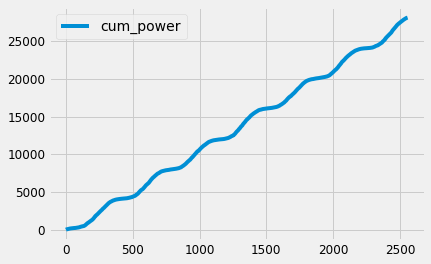

In [6]:
solar.plot()
plt.show()

In [7]:
solar = solar.set_index('date')
solar.index

Index(['26/10/2011', '27/10/2011', '28/10/2011', '29/10/2011', '30/10/2011',
       '31/10/2011', '1/11/2011', '2/11/2011', '3/11/2011', '4/11/2011',
       ...
       '17/10/2018', '18/10/2018', '19/10/2018', '20/10/2018', '21/10/2018',
       '22/10/2018', '23/10/2018', '24/10/2018', '25/10/2018', '26/10/2018'],
      dtype='object', name='date', length=2558)

In [8]:
y = solar['cum_power']

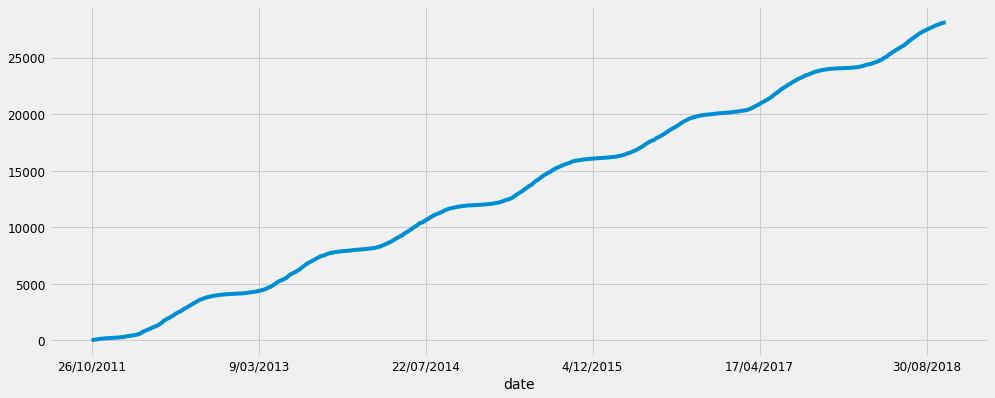

In [9]:
y.plot(figsize=(15, 6))
plt.show()

#### Centering moving average for the time series:

<AxesSubplot:xlabel='date'>

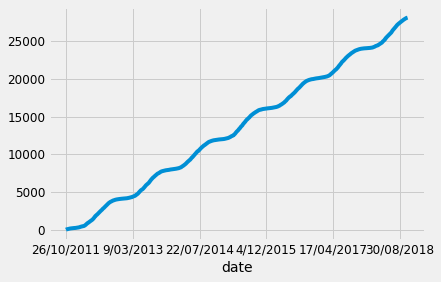

In [10]:
solar.cum_power.plot(label = "org")

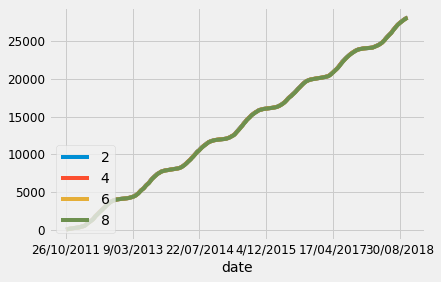

In [11]:
for i in range(2, 9, 2):
    solar["cum_power"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 3)

#### Time series decomposition plot: 

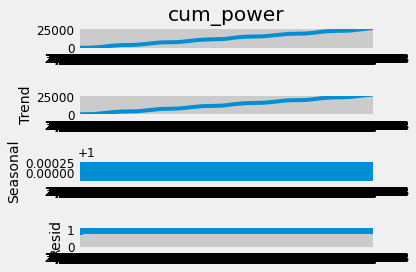

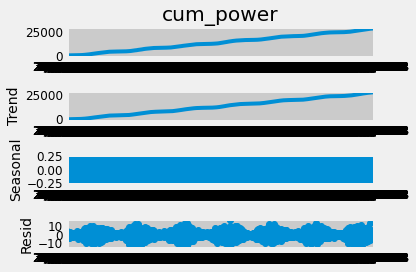

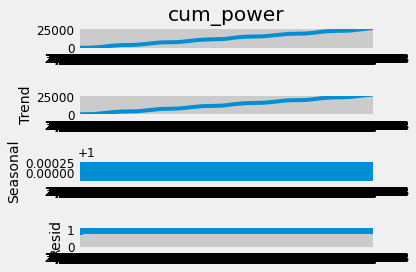

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decompose_ts_add = seasonal_decompose(solar.cum_power, model = "additive", period = 7)
decompose_ts_add.plot()

rcParams['figure.figsize'] = 18, 8
decompose_ts_mul = seasonal_decompose(solar.cum_power, model = "multiplicative", period = 7)
decompose_ts_mul.plot()

#### ACF plot on Original data sets :

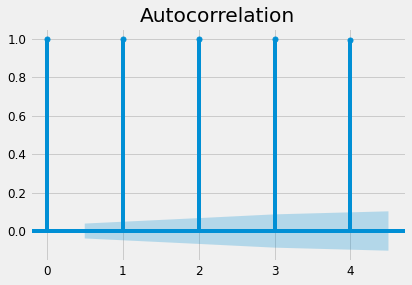

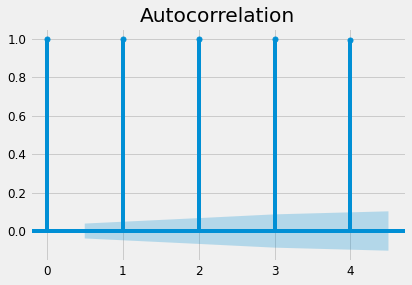

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(solar.cum_power, lags = 4)

In [18]:
Train = solar.head(2000)
Test = solar.tail(558)

In [19]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [20]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["cum_power"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.cum_power)

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [21]:
# Holt method 
hw_model = Holt(Train["cum_power"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.cum_power) 

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["cum_power"], seasonal = "add", trend = "add", seasonal_periods = 4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.cum_power)

In [ ]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["cum_power"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.cum_power) 